In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
X = iris.data
y = iris.target

print(X.shape)
print(y)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


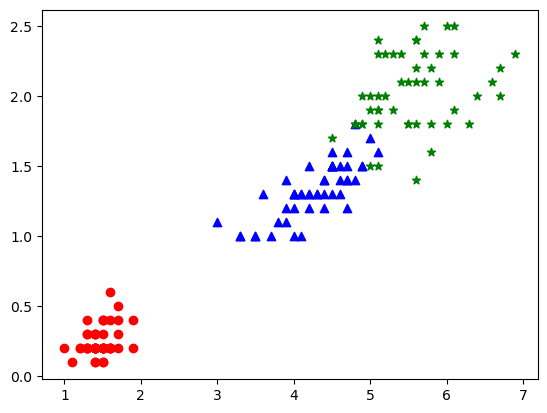

In [6]:
feature = 2
feature_other = 3

plt.scatter(X[0:50, feature], X[0:50, feature_other], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, feature], X[50:100, feature_other], color='blue', marker='^', label='versicolor')
plt.scatter(X[100:150, feature], X[100:150, feature_other], color='green', marker='*', label='virginica')

In [7]:
model = LogisticRegression(C=100)
model.fit(X, y)

LogisticRegression(C=100)

In [8]:
print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X)
print("准确率:", accuracy_score(y, y_pred))

[[ 2.50935285  4.72836077 -6.73572747 -3.38760119]
 [-0.11239857 -0.23816484 -0.20063514 -4.32794112]
 [-2.39695428 -4.49019593  6.93636262  7.71554231]]
[  1.9159118   13.46070841 -15.37662021]
准确率: 0.98


In [35]:
feature = 0
feature_other = 1
X_2 = X[:,[feature,feature_other]]
y_2 = y
model_2 = LogisticRegression(C=100)
model_2.fit(X_2, y_2)
y_pred_2 = model_2.predict(X_2)
print("准确率:", accuracy_score(y_2, y_pred_2))

准确率: 0.8333333333333334


In [36]:
h = 0.02
x_min, x_max = X[:, feature].min() - 0.5, X[:, feature].max() + 0.5
y_min, y_max = X[:, feature_other].min() - 0.5, X[:, feature_other].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
XX = np.c_[xx.ravel(), yy.ravel()]
YY = model_2.predict(XX)

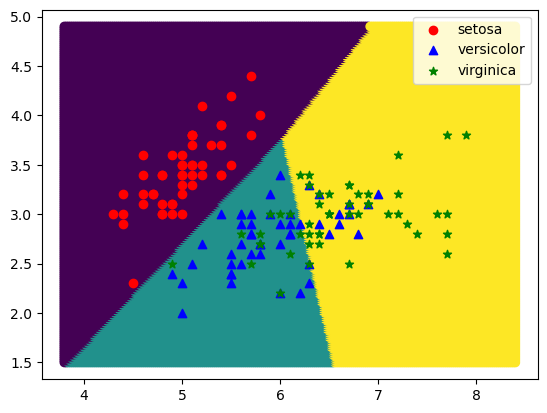

In [38]:
plt.scatter(xx,yy,c = YY)
plt.scatter(X[0:50, feature], X[0:50, feature_other], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, feature], X[50:100, feature_other], color='blue', marker='^', label='versicolor')
plt.scatter(X[100:150, feature], X[100:150, feature_other], color='green', marker='*', label='virginica')
plt.legend()
plt.show()